In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


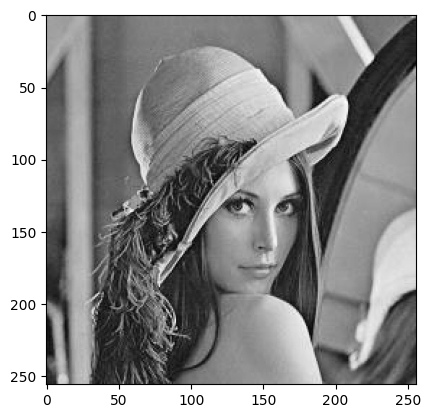

In [ ]:
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/abcdef.bmp')
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1, cmap='gray')

In [ ]:
gOutimg=np.zeros((gimg1.shape[0], gimg1.shape[1]))

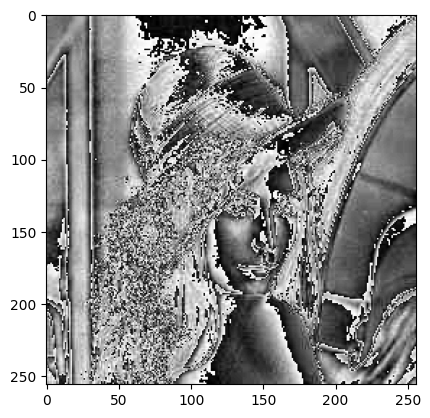

In [ ]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    val = gimg1[h,w] % 64
    val=val*4
    gOutimg[h,w]  = val

plt.imshow(gOutimg, cmap = 'gray')
#cv2_imshow(gOutimg)

In [ ]:
equalVal = 200
width = 5

min = equalVal - width
max = equalVal + width

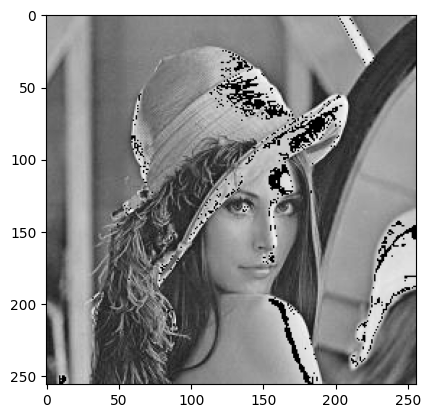

In [ ]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    if(gimg1[h,w] > min and gimg1[h,w] < max):
      gOutimg[h,w]=0
    else:
      gOutimg[h,w] = gimg1[h,w]

plt.imshow(gOutimg, cmap = 'gray')

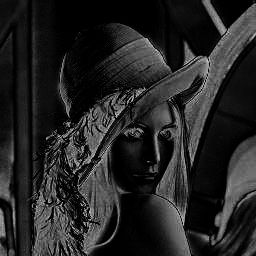

In [ ]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    val = 255*(gimg1[h,w]/128-1)*(gimg1[h,w]/128-1)
    gOutimg[h,w]=val

cv2_imshow(gOutimg)

In [ ]:
planeNumber = 1
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2

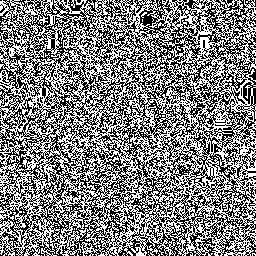

In [ ]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    imVal = (int)(gimg1[h,w] / planeValue)
    if(imVal % 2 == 0):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] =255

cv2_imshow(gOutimg)

(286, 322)


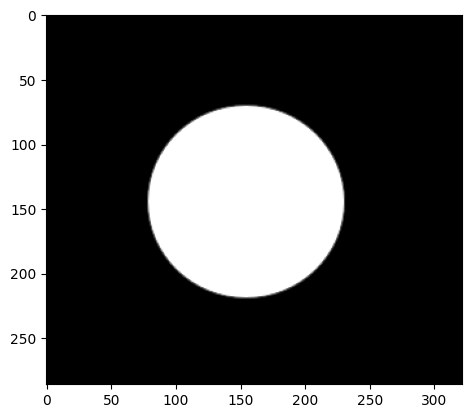

In [ ]:
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/a.bmp')
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/circle.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg2 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg2.shape)
plt.imshow(gimg2, cmap='gray')

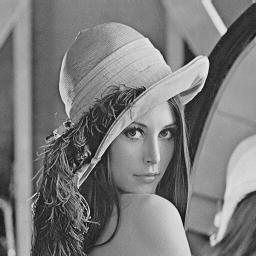

In [ ]:
gWaterMarker = gimg1.copy()

for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    imVal = gimg2[h,w]
    if(imVal > 128):
      if(gimg1[h,w] % 2 == 0):
        gWaterMarker[h,w] += 1
      else:
        if(gimg1[h,w] % 2 == 1):
          gWaterMarker[h,w] -= 1

cv2_imshow(gWaterMarker)

In [ ]:
planeValue = 1

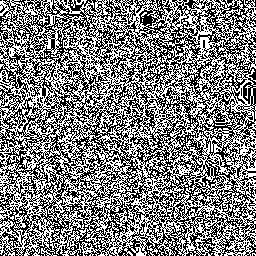

In [ ]:
for h in range(0, gWaterMarker.shape[0]):
  for w in range(0, gWaterMarker.shape[1]):
    imVal = (int)(gWaterMarker[h, w] / planeValue)
    if(imVal % 2 == 0):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] = 255

cv2_imshow(gOutimg)